# Quorum Sensing

Here we test a model of quorum sensing of Pseudomonas putida IsoF in continuous cultures with constant
delay which was published by K. Buddrus-Schiemann et al. in "Analysis of N-Acylhomoserine Lactone Dynamics in Continuous
Cultures of Pseudomonas Putida IsoF By Use of ELISA and UHPLC/qTOF-MS-derived Measurements
and Mathematical Models", Analytical and Bioanalytical Chemistry, 2014.


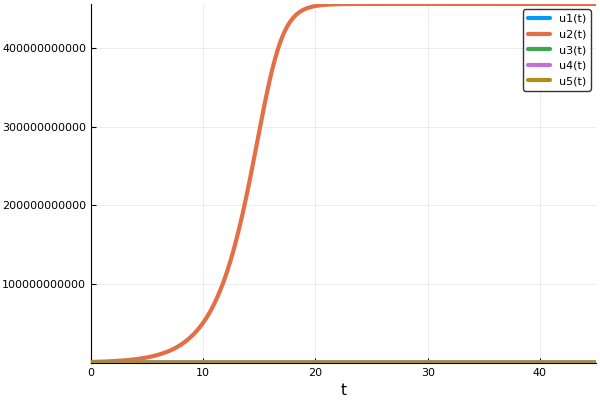

In [2]:
using DelayDiffEq, DiffEqDevTools, DiffEqProblemLibrary, Plots
pyplot()

sol = solve(prob_dde_qs, MethodOfSteps(Vern9(), max_fixedpoint_iters=1000); reltol=1e-14, abstol=1e-14)
plot(sol)

Particularly, we are interested in the third, low-level component of the system:


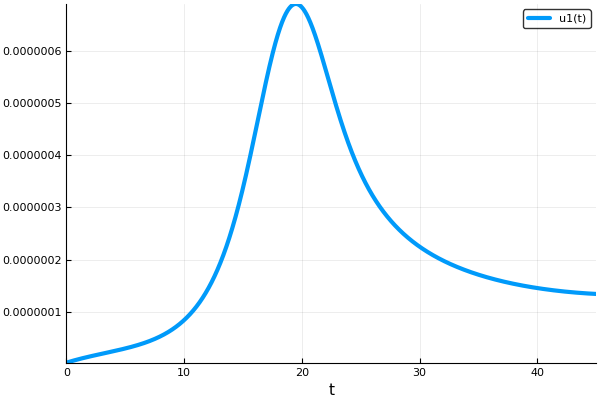

In [3]:
sol = solve(prob_dde_qs, MethodOfSteps(Vern9(), max_fixedpoint_iters=1000); reltol=1e-14, abstol=1e-14, save_idxs=3)
test_sol = TestSolution(sol)
plot(sol)

## Qualitative comparisons

First we compare the quality of the solution's third component for different algorithms, using the default tolerances.

### RK methods


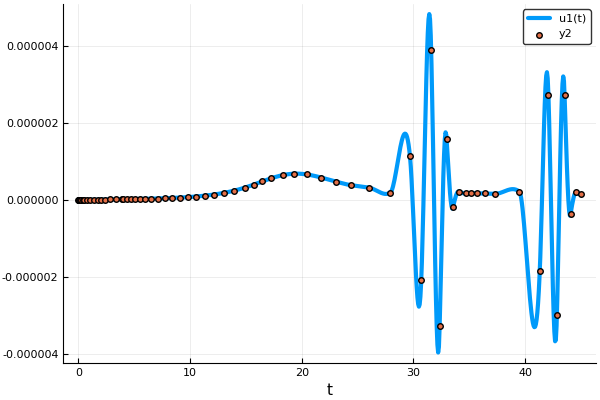

In [4]:
sol = solve(prob_dde_qs, MethodOfSteps(BS3()); reltol=1e-3, abstol=1e-6, save_idxs=3)
plot(sol); scatter!(sol.t, sol.u)


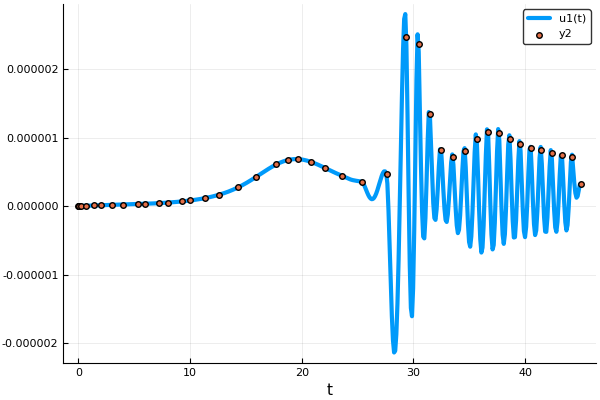

In [5]:
sol = solve(prob_dde_qs, MethodOfSteps(Tsit5()); reltol=1e-3, abstol=1e-6, save_idxs=3)
plot(sol); scatter!(sol.t, sol.u)


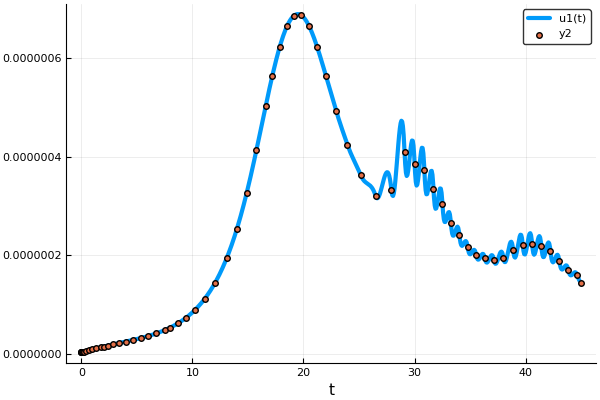

In [6]:
sol = solve(prob_dde_qs, MethodOfSteps(RK4()); reltol=1e-3, abstol=1e-6, save_idxs=3)
plot(sol); scatter!(sol.t, sol.u)


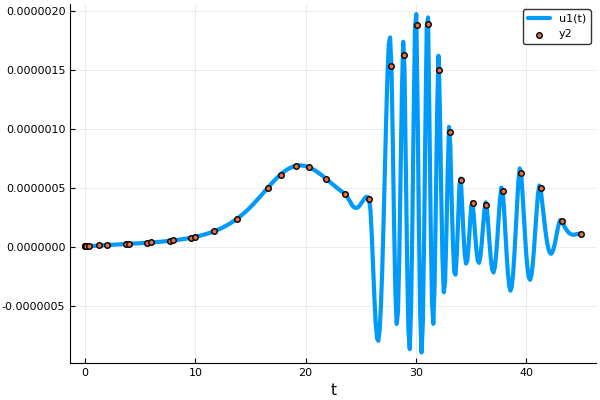

In [7]:
sol = solve(prob_dde_qs, MethodOfSteps(DP5()); reltol=1e-3, abstol=1e-6, save_idxs=3)
plot(sol); scatter!(sol.t, sol.u)


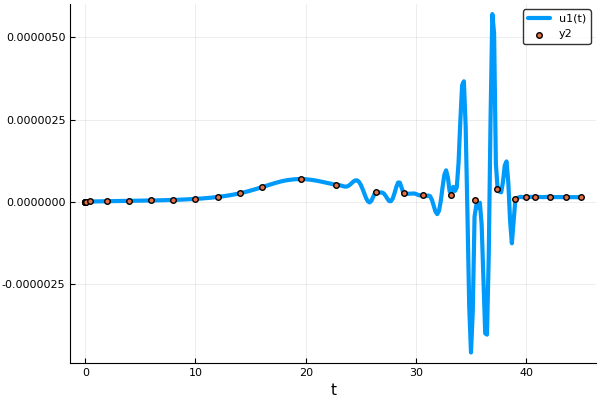

In [8]:
sol = solve(prob_dde_qs, MethodOfSteps(DP8()); reltol=1e-3, abstol=1e-6, save_idxs=3)
plot(sol); scatter!(sol.t, sol.u)


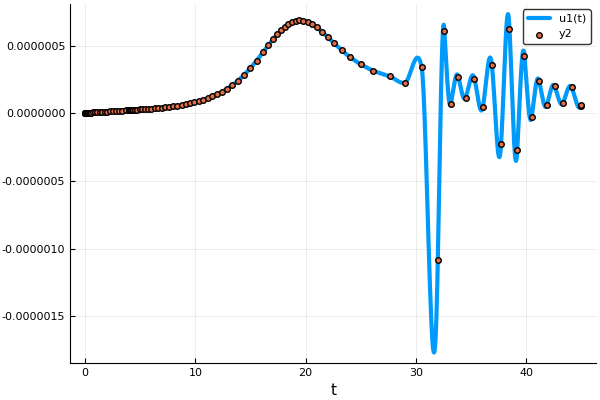

In [9]:
sol = solve(prob_dde_qs, MethodOfSteps(OwrenZen3()); reltol=1e-3, abstol=1e-6, save_idxs=3)
plot(sol); scatter!(sol.t, sol.u)


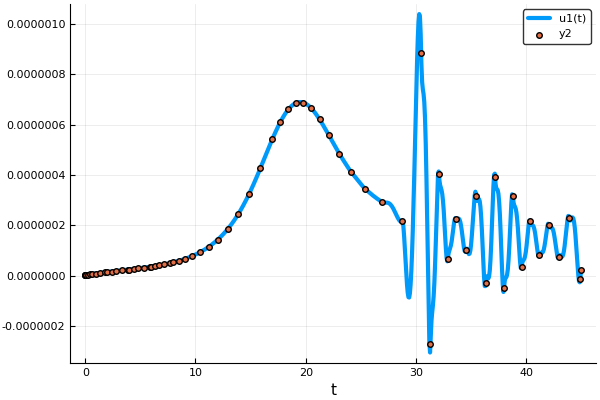

In [10]:
sol = solve(prob_dde_qs, MethodOfSteps(OwrenZen4()); reltol=1e-3, abstol=1e-6, save_idxs=3)
plot(sol); scatter!(sol.t, sol.u)


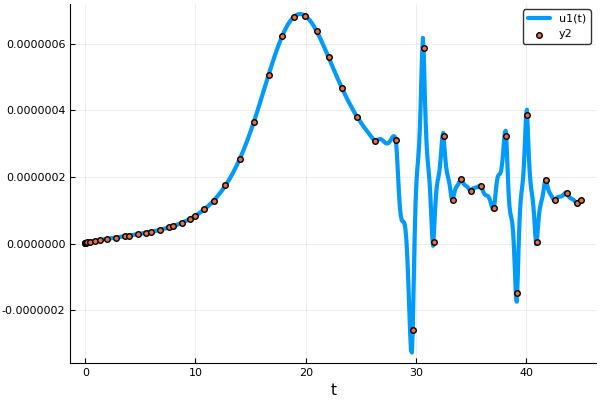

In [11]:
sol = solve(prob_dde_qs, MethodOfSteps(OwrenZen5()); reltol=1e-3, abstol=1e-6, save_idxs=3)
plot(sol); scatter!(sol.t, sol.u)

### Rosenbrock methods


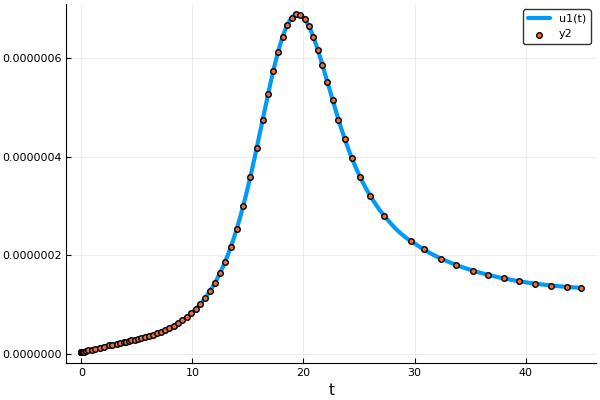

In [12]:
sol = solve(prob_dde_qs, MethodOfSteps(Rosenbrock23()); reltol=1e-3, abstol=1e-6, save_idxs=3)
plot(sol); scatter!(sol.t, sol.u)


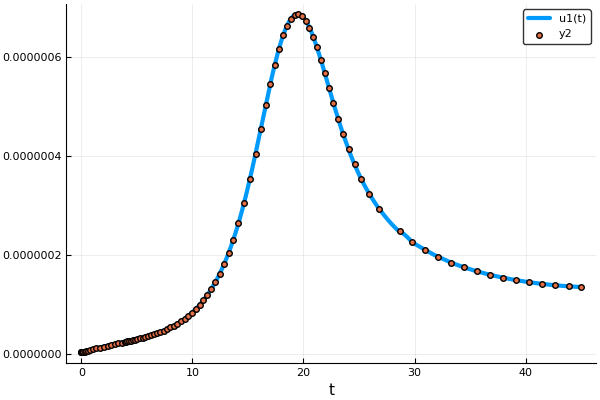

In [13]:
sol = solve(prob_dde_qs, MethodOfSteps(Rosenbrock32()); reltol=1e-3, abstol=1e-6, save_idxs=3)
plot(sol); scatter!(sol.t, sol.u)


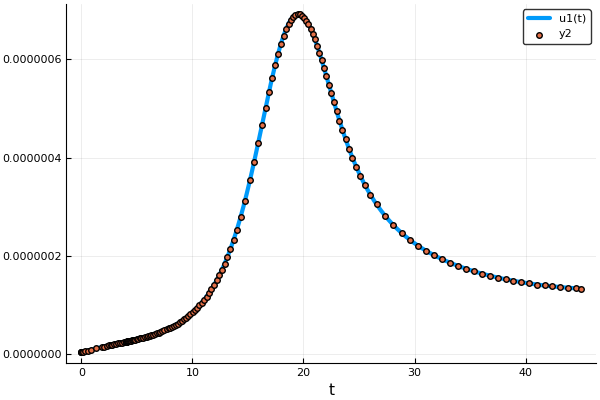

In [14]:
sol = solve(prob_dde_qs, MethodOfSteps(Rodas4()); reltol=1e-3, abstol=1e-6, save_idxs=3)
plot(sol); scatter!(sol.t, sol.u)


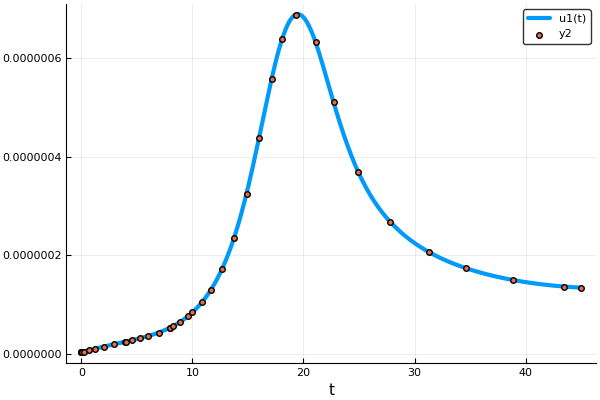

In [15]:
sol = solve(prob_dde_qs, MethodOfSteps(Rodas5()); reltol=1e-3, abstol=1e-6, save_idxs=3)
plot(sol); scatter!(sol.t, sol.u)

### Lazy interpolants


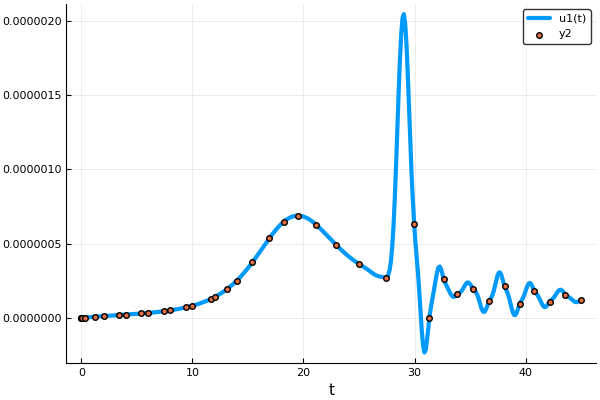

In [16]:
sol = solve(prob_dde_qs, MethodOfSteps(Vern7()); reltol=1e-3, abstol=1e-6, save_idxs=3)
plot(sol); scatter!(sol.t, sol.u)


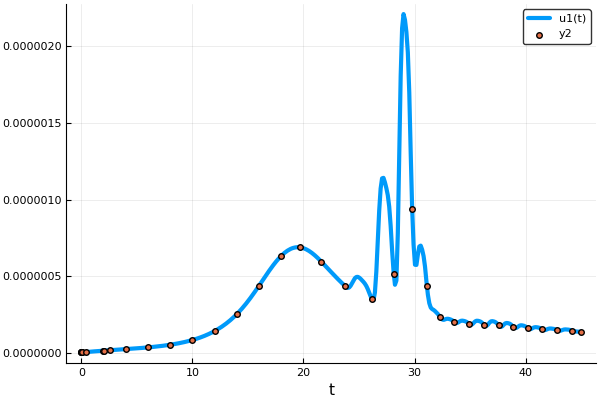

In [17]:
sol = solve(prob_dde_qs, MethodOfSteps(Vern9()); reltol=1e-3, abstol=1e-6, save_idxs=3)
plot(sol); scatter!(sol.t, sol.u)

## Qualitative comparisons

Now we compare these methods quantitatively.

### High tolerances

#### RK methods

We start with RK methods at high tolerances.


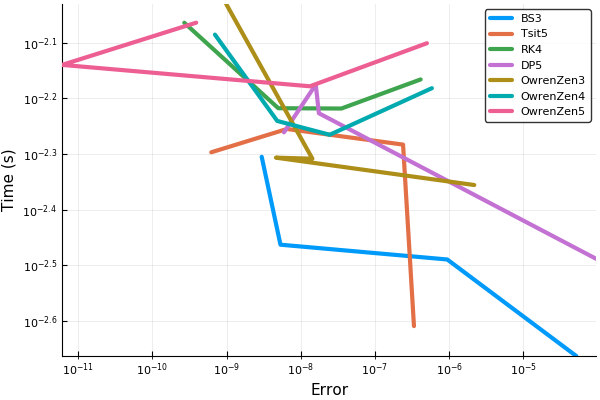

In [18]:
abstols = 1./10.^(4:7)
reltols = 1./10.^(1:4)

setups = [Dict(:alg=>MethodOfSteps(BS3())),
          Dict(:alg=>MethodOfSteps(Tsit5())),
          Dict(:alg=>MethodOfSteps(RK4())),
          Dict(:alg=>MethodOfSteps(DP5())),
          Dict(:alg=>MethodOfSteps(OwrenZen3())),
          Dict(:alg=>MethodOfSteps(OwrenZen4())),
          Dict(:alg=>MethodOfSteps(OwrenZen5()))]
names = ["BS3", "Tsit5", "RK4", "DP5", "OwrenZen3", "OwrenZen4", "OwrenZen5"]
wp = WorkPrecisionSet(prob_dde_qs,abstols,reltols,setups;names=names,
                      save_idxs=3,appxsol=test_sol,maxiters=Int(1e5),error_estimate=:final)
plot(wp)

We also compare interpolation errors:


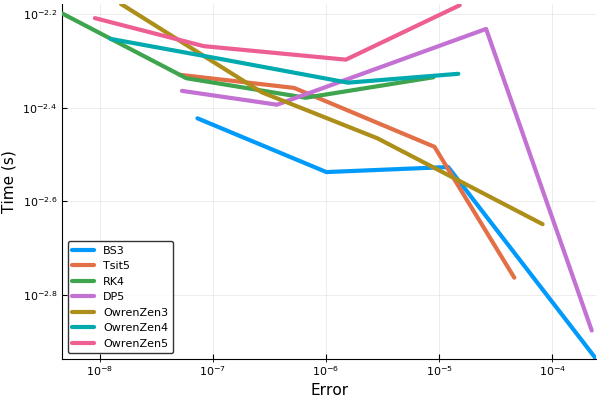

In [18]:
abstols = 1./10.^(4:7)
reltols = 1./10.^(1:4)

setups = [Dict(:alg=>MethodOfSteps(BS3())),
          Dict(:alg=>MethodOfSteps(Tsit5())),
          Dict(:alg=>MethodOfSteps(RK4())),
          Dict(:alg=>MethodOfSteps(DP5())),
          Dict(:alg=>MethodOfSteps(OwrenZen3())),
          Dict(:alg=>MethodOfSteps(OwrenZen4())),
          Dict(:alg=>MethodOfSteps(OwrenZen5()))]
names = ["BS3", "Tsit5", "RK4", "DP5", "OwrenZen3", "OwrenZen4", "OwrenZen5"]
wp = WorkPrecisionSet(prob_dde_qs,abstols,reltols,setups;names=names,
                      save_idxs=3,appxsol=test_sol,maxiters=Int(1e5),error_estimate=:L2)
plot(wp)

And the maximal interpolation error:


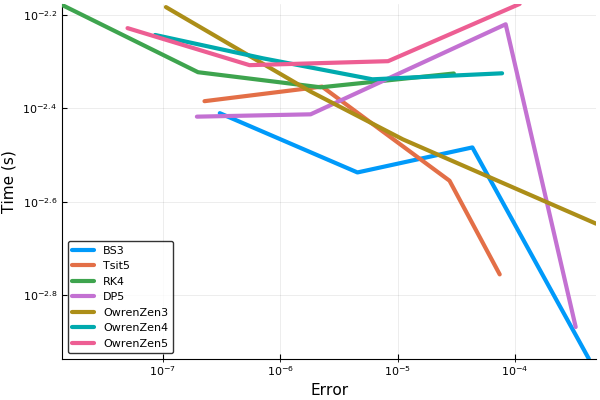

In [19]:
abstols = 1./10.^(4:7)
reltols = 1./10.^(1:4)

setups = [Dict(:alg=>MethodOfSteps(BS3())),
          Dict(:alg=>MethodOfSteps(Tsit5())),
          Dict(:alg=>MethodOfSteps(RK4())),
          Dict(:alg=>MethodOfSteps(DP5())),
          Dict(:alg=>MethodOfSteps(OwrenZen3())),
          Dict(:alg=>MethodOfSteps(OwrenZen4())),
          Dict(:alg=>MethodOfSteps(OwrenZen5()))]
names = ["BS3", "Tsit5", "RK4", "DP5", "OwrenZen3", "OwrenZen4", "OwrenZen5"]
wp = WorkPrecisionSet(prob_dde_qs,abstols,reltols,setups;names=names,
                      save_idxs=3,appxsol=test_sol,maxiters=Int(1e5),error_estimate=:L∞)
plot(wp)

Since the correct solution is in the range of 1e-7, we see that most solutions, even at the lower end of tested tolerances, always lead to relative maximal interpolation errors of at least 1e-1 (and usually worse). `RK4` performs slightly better with relative maximal errors of at least 1e-2. This matches our qualitative analysis above.

#### Rosenbrock methods

We repeat these tests with Rosenbrock methods, and include `RK4` as reference.


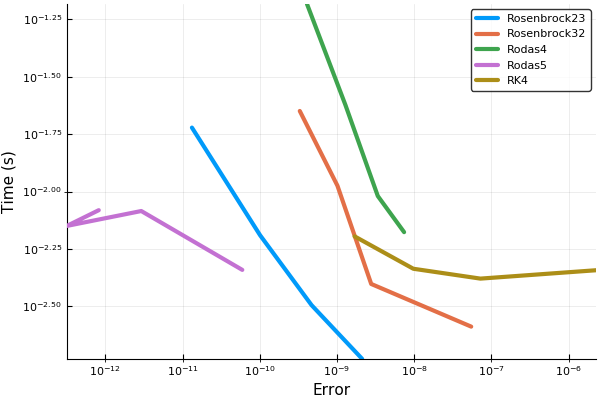

In [20]:
abstols = 1./10.^(4:7)
reltols = 1./10.^(1:4)

setups = [Dict(:alg=>MethodOfSteps(Rosenbrock23())),
          Dict(:alg=>MethodOfSteps(Rosenbrock32())),
          Dict(:alg=>MethodOfSteps(Rodas4())),
          Dict(:alg=>MethodOfSteps(Rodas5())),
          Dict(:alg=>MethodOfSteps(RK4()))]
names = ["Rosenbrock23", "Rosenbrock32", "Rodas4", "Rodas5", "RK4"]
wp = WorkPrecisionSet(prob_dde_qs,abstols,reltols,setups;names=names,
                      save_idxs=3,appxsol=test_sol,maxiters=Int(1e5),error_estimate=:final)
plot(wp)


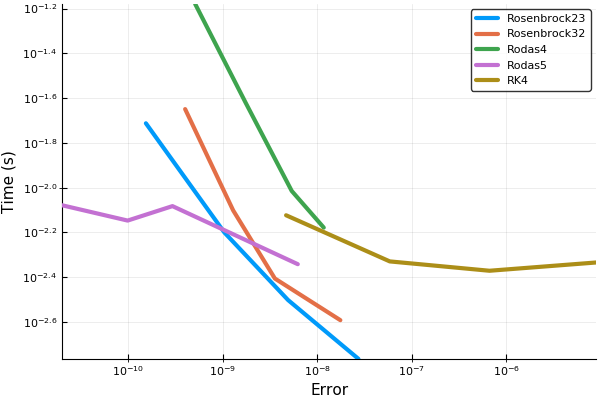

In [21]:
abstols = 1./10.^(4:7)
reltols = 1./10.^(1:4)

setups = [Dict(:alg=>MethodOfSteps(Rosenbrock23())),
          Dict(:alg=>MethodOfSteps(Rosenbrock32())),
          Dict(:alg=>MethodOfSteps(Rodas4())),
          Dict(:alg=>MethodOfSteps(Rodas5())),
          Dict(:alg=>MethodOfSteps(RK4()))]
names = ["Rosenbrock23", "Rosenbrock32", "Rodas4", "Rodas5", "RK4"]
wp = WorkPrecisionSet(prob_dde_qs,abstols,reltols,setups;names=names,
                      save_idxs=3,appxsol=test_sol,maxiters=Int(1e5),error_estimate=:L2)
plot(wp)


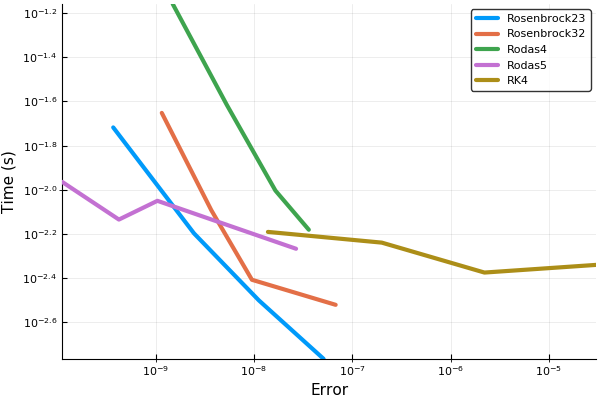

In [22]:
abstols = 1./10.^(4:7)
reltols = 1./10.^(1:4)

setups = [Dict(:alg=>MethodOfSteps(Rosenbrock23())),
          Dict(:alg=>MethodOfSteps(Rosenbrock32())),
          Dict(:alg=>MethodOfSteps(Rodas4())),
          Dict(:alg=>MethodOfSteps(Rodas5())),
          Dict(:alg=>MethodOfSteps(RK4()))]
names = ["Rosenbrock23", "Rosenbrock32", "Rodas4", "Rodas5", "RK4"]
wp = WorkPrecisionSet(prob_dde_qs,abstols,reltols,setups;names=names,
                      save_idxs=3,appxsol=test_sol,maxiters=Int(1e5),error_estimate=:L∞)
plot(wp)

Out of the tested Rosenbrock methods `Rodas5` and `Rosenbrock23` perform best at high tolerances.

#### Lazy interpolants

Finally we test the Verner methods with lazy interpolants, and include `Rodas5` as reference.


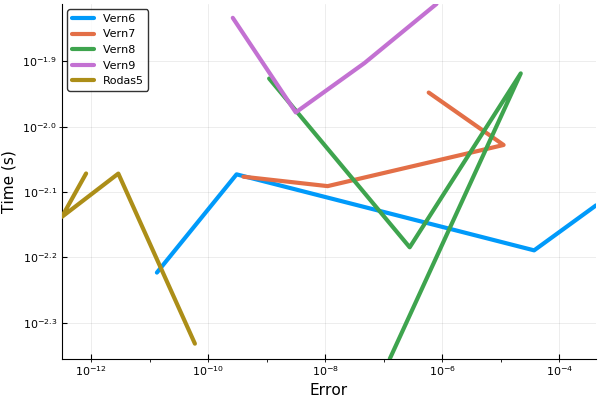

In [23]:
abstols = 1./10.^(4:7)
reltols = 1./10.^(1:4)

setups = [Dict(:alg=>MethodOfSteps(Vern6())),
          Dict(:alg=>MethodOfSteps(Vern7())),
          Dict(:alg=>MethodOfSteps(Vern8())),
          Dict(:alg=>MethodOfSteps(Vern9())),
          Dict(:alg=>MethodOfSteps(Rodas5()))]
names = ["Vern6", "Vern7", "Vern8", "Vern9", "Rodas5"]
wp = WorkPrecisionSet(prob_dde_qs,abstols,reltols,setups;names=names,
                      save_idxs=3,appxsol=test_sol,maxiters=Int(1e5),error_estimate=:final)
plot(wp)


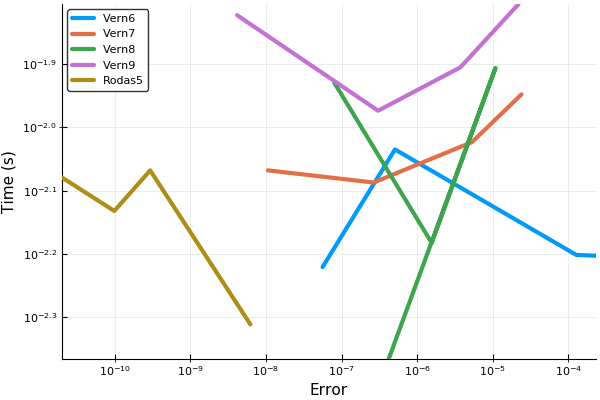

In [25]:
abstols = 1./10.^(4:7)
reltols = 1./10.^(1:4)

setups = [Dict(:alg=>MethodOfSteps(Vern6())),
          Dict(:alg=>MethodOfSteps(Vern7())),
          Dict(:alg=>MethodOfSteps(Vern8())),
          Dict(:alg=>MethodOfSteps(Vern9())),
          Dict(:alg=>MethodOfSteps(Rodas5()))]
names = ["Vern6", "Vern7", "Vern8", "Vern9", "Rodas5"]
wp = WorkPrecisionSet(prob_dde_qs,abstols,reltols,setups;names=names,
                      save_idxs=3,appxsol=test_sol,maxiters=Int(1e5),error_estimate=:L2)
plot(wp)


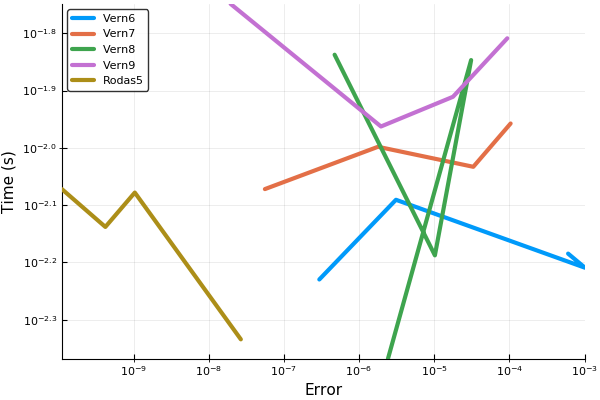

In [26]:
abstols = 1./10.^(4:7)
reltols = 1./10.^(1:4)

setups = [Dict(:alg=>MethodOfSteps(Vern6())),
          Dict(:alg=>MethodOfSteps(Vern7())),
          Dict(:alg=>MethodOfSteps(Vern8())),
          Dict(:alg=>MethodOfSteps(Vern9())),
          Dict(:alg=>MethodOfSteps(Rodas5()))]
names = ["Vern6", "Vern7", "Vern8", "Vern9", "Rodas5"]
wp = WorkPrecisionSet(prob_dde_qs,abstols,reltols,setups;names=names,
                      save_idxs=3,appxsol=test_sol,maxiters=Int(1e5),error_estimate=:L∞)
plot(wp)

All in all, at high tolerances `Rodas5` and `Rosenbrock23` are the best methods for solving this stiff DDE.

### Low tolerances

#### Rosenbrock methods

We repeat our tests of Rosenbrock methods `Rosenbrock23` and `Rodas5` at low tolerances:


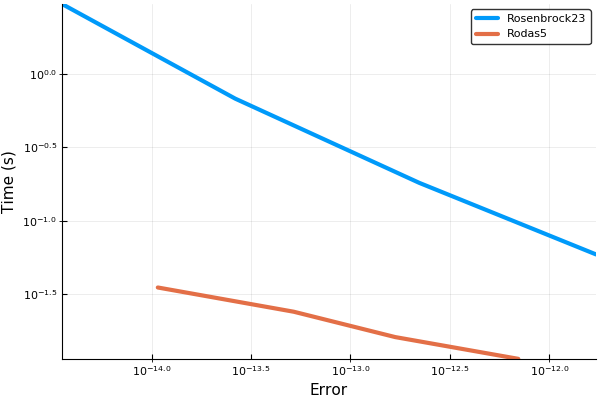

In [30]:
abstols = 1./10.^(8:11)
reltols = 1./10.^(5:8)

setups = [Dict(:alg=>MethodOfSteps(Rosenbrock23())),
          Dict(:alg=>MethodOfSteps(Rodas5()))]
names = ["Rosenbrock23", "Rodas5"]
wp = WorkPrecisionSet(prob_dde_qs,abstols,reltols,setups;names=names,
                      save_idxs=3,appxsol=test_sol,maxiters=Int(1e5),error_estimate=:final)
plot(wp)


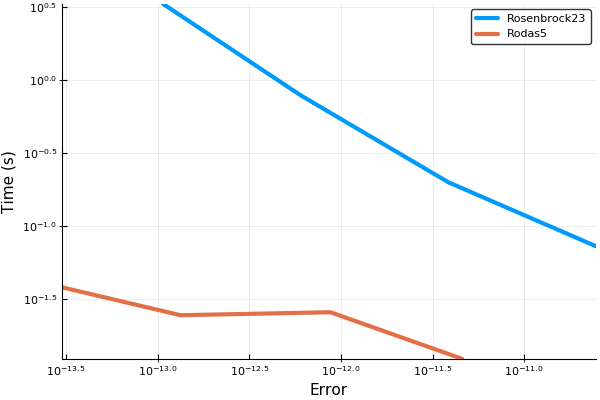

In [31]:
abstols = 1./10.^(8:11)
reltols = 1./10.^(5:8)

setups = [Dict(:alg=>MethodOfSteps(Rosenbrock23())),
          Dict(:alg=>MethodOfSteps(Rodas5()))]
names = ["Rosenbrock23", "Rodas5"]
wp = WorkPrecisionSet(prob_dde_qs,abstols,reltols,setups;names=names,
                      save_idxs=3,appxsol=test_sol,maxiters=Int(1e5),error_estimate=:L2)
plot(wp)


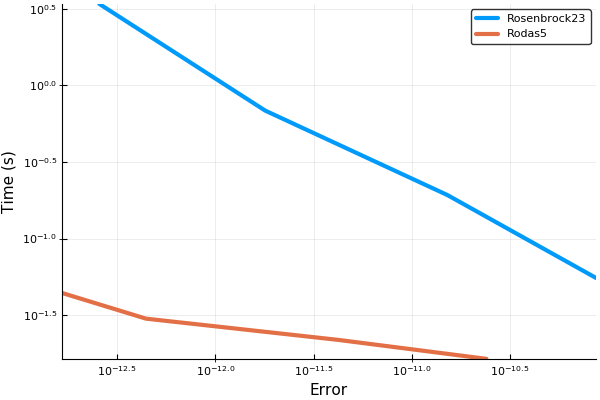

In [32]:
abstols = 1./10.^(8:11)
reltols = 1./10.^(5:8)

setups = [Dict(:alg=>MethodOfSteps(Rosenbrock23())),
          Dict(:alg=>MethodOfSteps(Rodas5()))]
names = ["Rosenbrock23", "Rodas5"]
wp = WorkPrecisionSet(prob_dde_qs,abstols,reltols,setups;names=names,
                      save_idxs=3,appxsol=test_sol,maxiters=Int(1e5),error_estimate=:L∞)
plot(wp)

Thus at low tolerances `Rodas5` outperforms `Rosenbrock23`.